# Defenders Beat by Pass Statistic

By Will Sivolella

## Project Description

I utilized StatsBomb open-source data and StatsBomb API to create a statistic that measured how many defenders are beat by a player's completed forward pass. I decided to use 2022 World Cup data because event data and event360 data were provided for every match and because it was a relatively recent competition. The new statistic along with other passing metrics provide an insight on the most effective and direct passers of the ball during the 2022 World Cup.

## Data Exploration

First, download the StatsBomb open-data and stored it in a local directory.

In [1]:
import pandas as pd 
import numpy as np
import math
from statsbombpy import sb
from mplsoccer import Pitch
from IPython.display import display, HTML

Exploring competitions data set and sorting by recency

In [2]:
comps = sb.competitions()

In [3]:
comps.sort_values(by = "season_name", ascending = False).reset_index(drop = True).head(10)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363
1,44,107,United States of America,Major League Soccer,male,False,False,2023,2023-12-13T04:51:24.677007,2023-12-13T04:53:55.191129,2023-12-13T04:53:55.191129,2023-12-13T04:51:24.677007
2,7,235,France,Ligue 1,male,False,False,2022/2023,2023-12-11T12:07:17.819532,2023-12-11T12:13:49.169623,2023-12-11T12:13:49.169623,2023-12-11T12:07:17.819532
3,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
4,43,106,International,FIFA World Cup,male,False,True,2022,2023-11-05T04:23:26.649917,2023-11-21T15:37:11.589616,2023-11-21T15:37:11.589616,2023-11-05T04:23:26.649917
5,7,108,France,Ligue 1,male,False,False,2021/2022,2023-10-17T06:13:50.369573,2023-10-17T06:16:02.924274,2023-10-17T06:16:02.924274,2023-10-17T06:13:50.369573
6,1238,108,India,Indian Super league,male,False,False,2021/2022,2023-03-31T02:14:09.896947,None,None,2023-03-31T02:14:09.896947
7,11,90,Spain,La Liga,male,False,False,2020/2021,2023-11-15T10:25:53.245065,2023-11-15T10:29:14.475865,2023-11-15T10:29:14.475865,2023-11-15T10:25:53.245065
8,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25T14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25T14:52:09.326729
9,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979


Exploring World Cup Matches dataset

In [4]:
matches_df = sb.matches(competition_id = 43, season_id = 106).sort_values(by = "match_date", ascending = False).reset_index(drop = True)

In [5]:
matches_df.head(10)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2023-08-17T15:55:15.164685,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2
1,3869684,2022-12-17,17:00:00.000,International - FIFA World Cup,2022,Croatia,Morocco,2,1,available,...,2023-04-26T22:18:59.308194,7,3rd Place Final,Sheikh Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Zlatko Dalić,Hoalid Regragui,1.1.0,2,2
2,3869552,2022-12-14,21:00:00.000,International - FIFA World Cup,2022,France,Morocco,2,0,available,...,2023-04-26T22:30:45.010084,6,Semi-finals,Al Bayt Stadium,César Arturo Ramos Palazuelos,Didier Deschamps,Hoalid Regragui,1.1.0,2,2
3,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,...,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
4,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,...,2023-04-26T23:03:02.645780,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,Hoalid Regragui,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
5,3869354,2022-12-10,21:00:00.000,International - FIFA World Cup,2022,England,France,1,2,available,...,2023-04-26T22:57:33.780657,5,Quarter-finals,Al Bayt Stadium,Wilton Pereira Sampaio,Gareth Southgate,Didier Deschamps,1.1.0,2,2
6,3869321,2022-12-09,21:00:00.000,International - FIFA World Cup,2022,Netherlands,Argentina,2,2,available,...,2023-06-21T17:51:12.511460,5,Quarter-finals,Lusail Stadium,Antonio Miguel Mateu Lahoz,Louis van Gaal,Lionel Sebastián Scaloni,1.1.0,2,2
7,3869420,2022-12-09,17:00:00.000,International - FIFA World Cup,2022,Croatia,Brazil,1,1,available,...,2023-04-26T23:04:13.569501,5,Quarter-finals,Education City Stadium,Michael Oliver,Zlatko Dalić,Telê Santana da Silva,1.1.0,2,2
8,3869220,2022-12-06,17:00:00.000,International - FIFA World Cup,2022,Morocco,Spain,0,0,available,...,2023-06-21T20:09:37.051885,4,Round of 16,Education City Stadium,Fernando Andrés Rapallini,Hoalid Regragui,Luis Enrique Martínez García,1.1.0,2,2
9,3869254,2022-12-06,21:00:00.000,International - FIFA World Cup,2022,Portugal,Switzerland,6,1,available,...,2023-07-29T08:59:00.508552,4,Round of 16,Lusail Stadium,César Arturo Ramos Palazuelos,Fernando Manuel Fernandes da Costa Santos,Murat Yakin,1.1.0,2,2


In [6]:
len(matches_df)

64

As shown above, all data for 64 2022 World Cup matches are provided.

Creating list of match_ids to get corresponding event and event360 data for each match.

In [7]:
match_id_list = list(matches_df.match_id)

Retrieving event and event360 data corresponding to the first match in the matches data frame, which is the World Cup Final.

In [8]:
events_df = sb.events(match_id = match_id_list[0])

#Change path to you local directory
events360_df = pd.read_json(f'C:/Users/wills/Documents/StatbombProject/open-data-master/open-data-master/data/three-sixty/{match_id_list[0]}.json')

In [9]:
events_df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

There is a lot of great event descriptions here, and I will isolate the columns relevant to passing later.

In [10]:
events360_df.head()

,event_uuid,visible_area,freeze_frame
0,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,97b5dc82-547a-4f93-a632-a2a8daf5ac98,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
2,9707e590-1d55-4d25-a50f-475019356152,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
3,a5956ecc-d637-44d2-8705-e2079e12013e,"[10.227276315524, 80.0, 41.5155332886657, 0.0,...","[{'teammate': True, 'actor': False, 'keeper': ..."
4,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,"[13.2232254880239, 80.0, 0.0, 65.4802459369524...","[{'teammate': True, 'actor': False, 'keeper': ..."


The most relevant data from the event360 data frame is the freeze_frame column containing player location data for each event.

## Data Cleaning

Now that I have an understanding of the data, I want to create data frames that will best allow me to formulate the defenders beat by pass statistic as well as showcase other relevant passing statistics. The first step is to merge event data with the event360 data in order to put all the information into one data frame.

In [11]:
events_merged_df = pd.merge(left = events_df, right = events360_df, left_on='id', right_on = 'event_uuid', how = 'left')

Repeat process so that the event data is grouped with the corresponding event360 data for each match and combine all matches into single data frame.

In [12]:
for i in range(1, len(match_id_list)):
    events_df = sb.events(match_id = match_id_list[i])
    
    #Change path to your local directory
    events360_df = pd.read_json(f'C:/Users/wills/Documents/StatbombProject/open-data-master/open-data-master/data/three-sixty/{match_id_list[i]}.json')
    events_merged_df_temp = pd.merge(left = events_df, right = events360_df, left_on='id', right_on = 'event_uuid', how = 'left')
    events_merged_df = pd.concat([events_merged_df, events_merged_df_temp], axis=0)

events_merged_df = events_merged_df.reset_index(drop = True)

Filter data frame to only get pass and ball receipt instances. Ball receipt instances are needed to get player location data at the time a pass is received.

In [13]:
passes = events_merged_df.query('type == "Pass"').reset_index(drop = True)
ball_receipts = events_merged_df.query('type == "Ball Receipt*"').reset_index(drop = True)

Only include relevant columns for passes data frame (best to be generous with column inclusion).

In [14]:
passes = passes[['timestamp', 'id', 'related_events', 'player_id', 'player', 'position', 'pass_recipient', \
                    'team', 'type', 'location', 'pass_end_location', 'pass_angle', 'pass_outcome', \
                    'ball_receipt_outcome', 'under_pressure', 'visible_area', 'freeze_frame']]

Only want completed forward passes to generate statistic.

In [15]:
passes_complete = passes[passes['pass_outcome'].isna()]

low_bound = -1*(math.pi/2)
up_bound = math.pi/2

passes_clean = passes_complete.query('@low_bound < pass_angle < @up_bound').reset_index(drop = True)

In [16]:
passes_clean.head()

,timestamp,id,related_events,player_id,player,position,pass_recipient,team,type,location,pass_end_location,pass_angle,pass_outcome,ball_receipt_outcome,under_pressure,visible_area,freeze_frame
0,00:00:16.423,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,[2be9a9f2-84ab-4935-8fb2-bd497202fa2f],29201.0,Nahuel Molina Lucero,Right Back,Rodrigo Javier De Paul,Argentina,Pass,"[22.7, 80.0]","[36.0, 75.2]",-0.346354,NaN,NaN,NaN,"[13.2232254880239, 80.0, 0.0, 65.4802459369524...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,00:00:43.285,4fd86774-8f37-4ea2-b562-b1a43c5adedf,[b2e3ba63-98d2-4e2e-b456-3b9af203f6b2],20572.0,Cristian Gabriel Romero,Right Center Back,Nicolás Hernán Otamendi,Argentina,Pass,"[22.1, 49.8]","[24.0, 27.3]",-1.486552,NaN,NaN,NaN,"[29.385985950492, 80.0, 0.0, 32.2073989990798,...","[{'teammate': True, 'actor': False, 'keeper': ..."
2,00:00:45.601,4a4fd288-9139-4987-9c2a-3ab0e1793310,[f6c30bac-9533-4dd1-bff7-95900d699747],3090.0,Nicolás Hernán Otamendi,Left Center Back,Nicolás Alejandro Tagliafico,Argentina,Pass,"[21.7, 24.5]","[26.6, 3.1]",-1.345705,NaN,NaN,NaN,"[30.5605143200198, 80.0, 0.0, 27.2021129896892...","[{'teammate': True, 'actor': False, 'keeper': ..."
3,00:00:47.599,bdf6b02c-1c04-4777-9617-bf73ececbf6c,[585421b8-3acc-4627-8b3c-74496fd20d1d],5507.0,Nicolás Alejandro Tagliafico,Left Back,Alexis Mac Allister,Argentina,Pass,"[29.2, 2.5]","[45.6, 4.2]",0.103290,NaN,NaN,NaN,"[37.4265111045447, 72.5965110725852, 5.8546057...","[{'teammate': True, 'actor': False, 'keeper': ..."
4,00:01:31.390,1af94a8d-cb50-4d93-96e1-19fa1ae154fb,[caa393a7-8230-44aa-8b37-ad3929626929],6704.0,Theo Bernard François Hernández,Left Back,Adrien Rabiot,France,Pass,"[68.5, 5.7]","[72.1, 13.4]",1.133458,NaN,NaN,NaN,"[46.2319746475165, 80.0, 54.3950916985312, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."


Show only relevant columns in ball receipts dataframe (again generous with inclusion of column names).

In [17]:
ball_receipts = ball_receipts[['id', 'related_events', 'player_id', 'player', 'position', \
                               'team', 'type', 'ball_receipt_outcome', 'under_pressure', 'visible_area',\
                               'freeze_frame']]

In [18]:
ball_receipts.head()

,id,related_events,player_id,player,position,team,type,ball_receipt_outcome,under_pressure,visible_area,freeze_frame
0,97b5dc82-547a-4f93-a632-a2a8daf5ac98,[f651a6c4-55e3-4e0f-a178-59414ba83d6a],10481.0,Aurélien Djani Tchouaméni,Right Defensive Midfield,France,Ball Receipt*,NaN,NaN,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,810629a9-ac49-494a-b859-89ef3ff36c57,[a5956ecc-d637-44d2-8705-e2079e12013e],3604.0,Olivier Giroud,Center Forward,France,Ball Receipt*,Incomplete,NaN,NaN,NaN
2,2be9a9f2-84ab-4935-8fb2-bd497202fa2f,"[54bd94ec-86b7-4428-b71b-286c1e080b9f, 5ba6dfa...",7797.0,Rodrigo Javier De Paul,Right Center Midfield,Argentina,Ball Receipt*,NaN,True,"[19.2281251109993, 80.0, 0.0, 55.8025055084597...","[{'teammate': True, 'actor': False, 'keeper': ..."
3,22dde0b6-5149-411e-a910-68f6aa5b7523,[27829865-a43c-4c50-b545-b09e8a965e16],20572.0,Cristian Gabriel Romero,Right Center Back,Argentina,Ball Receipt*,NaN,NaN,"[28.2774421358432, 80.0, 0.0, 37.4565229281342...","[{'teammate': True, 'actor': False, 'keeper': ..."
4,29f8db49-f71f-4177-9825-3e93697fa4ba,[59420b0c-94cc-4fb8-86fb-e1105936f6eb],3090.0,Nicolás Hernán Otamendi,Left Center Back,Argentina,Ball Receipt*,NaN,NaN,"[33.3766202915148, 80.0, 0.0, 23.6977864743699...","[{'teammate': True, 'actor': False, 'keeper': ..."


Merge data frames so that so passes and corresponding ball receipts are on same row.

In [19]:
passes_clean = passes_clean.explode('related_events').reset_index(drop = True)
combined_df = pd.merge(passes_clean, ball_receipts, left_on='related_events', right_on='id', how='inner')

In [20]:
lost_in_merge = len(passes_clean) - len(combined_df)
percent_retained_in_merge = 100-round(((lost_in_merge)/len(passes_clean))*100,2)
percent_retained_in_merge

88.2

88.2% of the completed forward passes for every match throughout the 2022 World Cup has a corresponding ball receipt event.

Filter by if freeze_frame location data is available for ball receipt instances.

In [21]:
combined_df_clean = combined_df[combined_df['freeze_frame_y'].notna()].reset_index(drop = True)

In [22]:
no_freeze_frame = len(combined_df) - len(combined_df_clean)
percent_retained = 100-round(((len(passes_clean) - len(combined_df_clean))/len(passes_clean))*100,2)
percent_retained

79.25

79.25% of the completed forward passes for every match throughout the 2022 World Cup has a corresponding ball receipt and location data at the time the pass is received.

In [23]:
combined_df_clean.head()

,timestamp,id_x,related_events_x,player_id_x,player_x,position_x,pass_recipient,team_x,type_x,location,...,related_events_y,player_id_y,player_y,position_y,team_y,type_y,ball_receipt_outcome_y,under_pressure_y,visible_area_y,freeze_frame_y
0,00:00:16.423,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,2be9a9f2-84ab-4935-8fb2-bd497202fa2f,29201.0,Nahuel Molina Lucero,Right Back,Rodrigo Javier De Paul,Argentina,Pass,"[22.7, 80.0]",...,"[54bd94ec-86b7-4428-b71b-286c1e080b9f, 5ba6dfa...",7797.0,Rodrigo Javier De Paul,Right Center Midfield,Argentina,Ball Receipt*,NaN,True,"[19.2281251109993, 80.0, 0.0, 55.8025055084597...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,00:00:43.285,4fd86774-8f37-4ea2-b562-b1a43c5adedf,b2e3ba63-98d2-4e2e-b456-3b9af203f6b2,20572.0,Cristian Gabriel Romero,Right Center Back,Nicolás Hernán Otamendi,Argentina,Pass,"[22.1, 49.8]",...,[4fd86774-8f37-4ea2-b562-b1a43c5adedf],3090.0,Nicolás Hernán Otamendi,Left Center Back,Argentina,Ball Receipt*,NaN,NaN,"[31.182642563991, 80.0, 0.0, 27.9785829571779,...","[{'teammate': True, 'actor': True, 'keeper': F..."
2,00:00:45.601,4a4fd288-9139-4987-9c2a-3ab0e1793310,f6c30bac-9533-4dd1-bff7-95900d699747,3090.0,Nicolás Hernán Otamendi,Left Center Back,Nicolás Alejandro Tagliafico,Argentina,Pass,"[21.7, 24.5]",...,"[34e4c829-064b-4e37-b02c-e997f114b25f, 4a4fd28...",5507.0,Nicolás Alejandro Tagliafico,Left Back,Argentina,Ball Receipt*,NaN,True,"[32.8790787384659, 71.6903575015306, 0.0, 4.11...","[{'teammate': True, 'actor': False, 'keeper': ..."
3,00:00:47.599,bdf6b02c-1c04-4777-9617-bf73ececbf6c,585421b8-3acc-4627-8b3c-74496fd20d1d,5507.0,Nicolás Alejandro Tagliafico,Left Back,Alexis Mac Allister,Argentina,Pass,"[29.2, 2.5]",...,[bdf6b02c-1c04-4777-9617-bf73ececbf6c],27886.0,Alexis Mac Allister,Left Center Midfield,Argentina,Ball Receipt*,NaN,NaN,"[39.064604437067, 64.0003487655734, 13.5233856...","[{'teammate': True, 'actor': False, 'keeper': ..."
4,00:01:31.390,1af94a8d-cb50-4d93-96e1-19fa1ae154fb,caa393a7-8230-44aa-8b37-ad3929626929,6704.0,Theo Bernard François Hernández,Left Back,Adrien Rabiot,France,Pass,"[68.5, 5.7]",...,[1af94a8d-cb50-4d93-96e1-19fa1ae154fb],3026.0,Adrien Rabiot,Left Defensive Midfield,France,Ball Receipt*,NaN,NaN,"[50.0778555883713, 80.0, 55.7493421482592, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ..."


## Generating Statistics

### Calculating Defenders Beat by Pass Statistic

In [24]:
pass_defenders_beat = []

for i in range(len(combined_df_clean)):
    x = i
    y = x+1
    
    inst = combined_df_clean[x:y]

    x_start = inst.location[x][0]
    x_end = inst.pass_end_location[x][0]

    count = 0

    for i in inst.iloc[0]['freeze_frame_y']:
        if i['teammate'] == False:
            if x_start < i['location'][0] < x_end:
                count += 1
    pass_defenders_beat.append(count)

Add stat to data frame

In [25]:
combined_df_clean['pass_defenders_beat'] = pass_defenders_beat

In [26]:
combined_df_clean.head()

,timestamp,id_x,related_events_x,player_id_x,player_x,position_x,pass_recipient,team_x,type_x,location,...,player_id_y,player_y,position_y,team_y,type_y,ball_receipt_outcome_y,under_pressure_y,visible_area_y,freeze_frame_y,pass_defenders_beat
0,00:00:16.423,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,2be9a9f2-84ab-4935-8fb2-bd497202fa2f,29201.0,Nahuel Molina Lucero,Right Back,Rodrigo Javier De Paul,Argentina,Pass,"[22.7, 80.0]",...,7797.0,Rodrigo Javier De Paul,Right Center Midfield,Argentina,Ball Receipt*,NaN,True,"[19.2281251109993, 80.0, 0.0, 55.8025055084597...","[{'teammate': True, 'actor': False, 'keeper': ...",4
1,00:00:43.285,4fd86774-8f37-4ea2-b562-b1a43c5adedf,b2e3ba63-98d2-4e2e-b456-3b9af203f6b2,20572.0,Cristian Gabriel Romero,Right Center Back,Nicolás Hernán Otamendi,Argentina,Pass,"[22.1, 49.8]",...,3090.0,Nicolás Hernán Otamendi,Left Center Back,Argentina,Ball Receipt*,NaN,NaN,"[31.182642563991, 80.0, 0.0, 27.9785829571779,...","[{'teammate': True, 'actor': True, 'keeper': F...",0
2,00:00:45.601,4a4fd288-9139-4987-9c2a-3ab0e1793310,f6c30bac-9533-4dd1-bff7-95900d699747,3090.0,Nicolás Hernán Otamendi,Left Center Back,Nicolás Alejandro Tagliafico,Argentina,Pass,"[21.7, 24.5]",...,5507.0,Nicolás Alejandro Tagliafico,Left Back,Argentina,Ball Receipt*,NaN,True,"[32.8790787384659, 71.6903575015306, 0.0, 4.11...","[{'teammate': True, 'actor': False, 'keeper': ...",1
3,00:00:47.599,bdf6b02c-1c04-4777-9617-bf73ececbf6c,585421b8-3acc-4627-8b3c-74496fd20d1d,5507.0,Nicolás Alejandro Tagliafico,Left Back,Alexis Mac Allister,Argentina,Pass,"[29.2, 2.5]",...,27886.0,Alexis Mac Allister,Left Center Midfield,Argentina,Ball Receipt*,NaN,NaN,"[39.064604437067, 64.0003487655734, 13.5233856...","[{'teammate': True, 'actor': False, 'keeper': ...",3
4,00:01:31.390,1af94a8d-cb50-4d93-96e1-19fa1ae154fb,caa393a7-8230-44aa-8b37-ad3929626929,6704.0,Theo Bernard François Hernández,Left Back,Adrien Rabiot,France,Pass,"[68.5, 5.7]",...,3026.0,Adrien Rabiot,Left Defensive Midfield,France,Ball Receipt*,NaN,NaN,"[50.0778555883713, 80.0, 55.7493421482592, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",1


### Explaination of Defenders Beat by Pass Statistic

The defenders beat by pass statistic measures how many defenders are between the location of where the ball was played and the location of where the ball was successfully received by a teammate at the time when the ball was received. The aspect of location that is considered for the calculation of this statistic is the x-coordinate, the goal-to-goal direction of the field. I only chose the x-direction because passing in the y-direction or side-to-side does not inherently advance the ball and take defenders temporarily out of the play. I also chose to measure the position of players at the time the pass was received instead of when the pass was played to account for movement of defenders while the pass is traveling.

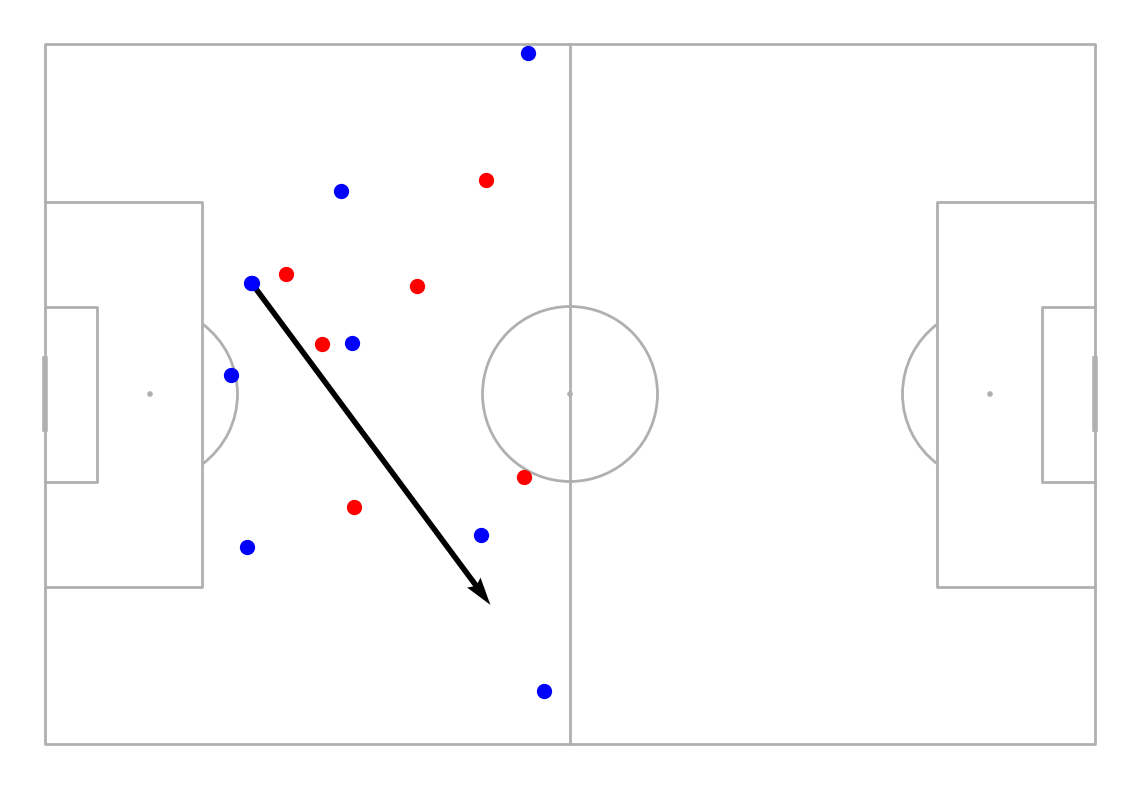

In [27]:
p = Pitch(pitch_type = 'statsbomb')
fig, ax = p.draw(figsize = (12, 8))

x = 24
y = x+1

inst = combined_df_clean[x:y]

p.scatter(x = inst.location[x][0], y = inst.location[x][1], ax=ax, c = 'blue', s = 100)
p.arrows(xstart = inst.location[x][0], ystart = inst.location[x][1], xend = inst.pass_end_location[x][0], yend = inst.pass_end_location[x][1], ax = ax)

for i in inst.iloc[0]['freeze_frame_x']:
    if i['teammate']:
        color = 'blue'
    else:
        color = 'red'
    p.scatter(x=i['location'][0], y=i['location'][1], ax=ax, c = color, s = 100)

The plot above is a single pass instance from the 2022 World Cup Final. It shows the player passing the pass, the pass vector, his teammates (blue) and his opponents (red) at the time when the pass is played.

In [28]:
#Defenders beaten code.

x = 24
y = x+1

inst = combined_df_clean[x:y]

x_start = inst.location[x][0]
x_end = inst.pass_end_location[x][0]

count = 0

for i in inst.iloc[0]['freeze_frame_x']:
    if i['teammate'] == False:
        if x_start < i['location'][0] < x_end:
            count += 1
print(count)

5


If I were to use the location data at the time the pass is played to calculate the statistic, 5 defenders would be beated by that pass in the x-direction (as shown by the code output and plot)

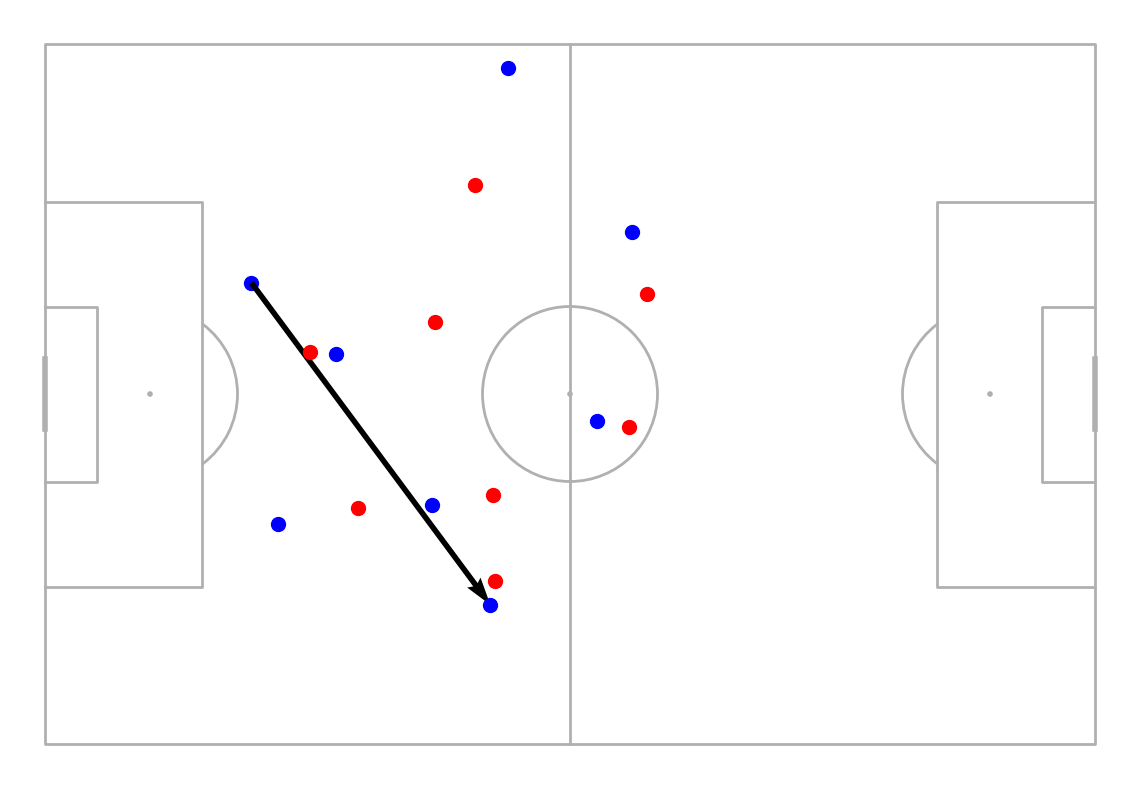

In [29]:
p = Pitch(pitch_type = 'statsbomb')
fig, ax = p.draw(figsize = (12, 8))

x = 24
y = x+1

inst = combined_df_clean[x:y]

p.scatter(x = inst.location[x][0], y = inst.location[x][1], ax=ax, c = 'blue', s = 100)
p.arrows(xstart = inst.location[x][0], ystart = inst.location[x][1], xend = inst.pass_end_location[x][0], yend = inst.pass_end_location[x][1], ax = ax)

for i in inst.iloc[0]['freeze_frame_y']:
    if i['teammate']:
        color = 'blue'
    else:
        color = 'red'
    p.scatter(x=i['location'][0], y=i['location'][1], ax=ax, c = color, s = 100)

The plot above uses the location data at the time the ball is received to account for the recovery of the defenders while the pass is traveling.

In [30]:
inst['pass_defenders_beat'][24]

4

When accounting for the recovery of defenders while the pass is traveling, the actual amount of defenders beat in the x-direction is 4.

### Get Individual Player Stats from Event Data

In [31]:
combined_df_clean

,timestamp,id_x,related_events_x,player_id_x,player_x,position_x,pass_recipient,team_x,type_x,location,...,player_id_y,player_y,position_y,team_y,type_y,ball_receipt_outcome_y,under_pressure_y,visible_area_y,freeze_frame_y,pass_defenders_beat
0,00:00:16.423,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,2be9a9f2-84ab-4935-8fb2-bd497202fa2f,29201.0,Nahuel Molina Lucero,Right Back,Rodrigo Javier De Paul,Argentina,Pass,"[22.7, 80.0]",...,7797.0,Rodrigo Javier De Paul,Right Center Midfield,Argentina,Ball Receipt*,NaN,True,"[19.2281251109993, 80.0, 0.0, 55.8025055084597...","[{'teammate': True, 'actor': False, 'keeper': ...",4
1,00:00:43.285,4fd86774-8f37-4ea2-b562-b1a43c5adedf,b2e3ba63-98d2-4e2e-b456-3b9af203f6b2,20572.0,Cristian Gabriel Romero,Right Center Back,Nicolás Hernán Otamendi,Argentina,Pass,"[22.1, 49.8]",...,3090.0,Nicolás Hernán Otamendi,Left Center Back,Argentina,Ball Receipt*,NaN,NaN,"[31.182642563991, 80.0, 0.0, 27.9785829571779,...","[{'teammate': True, 'actor': True, 'keeper': F...",0
2,00:00:45.601,4a4fd288-9139-4987-9c2a-3ab0e1793310,f6c30bac-9533-4dd1-bff7-95900d699747,3090.0,Nicolás Hernán Otamendi,Left Center Back,Nicolás Alejandro Tagliafico,Argentina,Pass,"[21.7, 24.5]",...,5507.0,Nicolás Alejandro Tagliafico,Left Back,Argentina,Ball Receipt*,NaN,True,"[32.8790787384659, 71.6903575015306, 0.0, 4.11...","[{'teammate': True, 'actor': False, 'keeper': ...",1
3,00:00:47.599,bdf6b02c-1c04-4777-9617-bf73ececbf6c,585421b8-3acc-4627-8b3c-74496fd20d1d,5507.0,Nicolás Alejandro Tagliafico,Left Back,Alexis Mac Allister,Argentina,Pass,"[29.2, 2.5]",...,27886.0,Alexis Mac Allister,Left Center Midfield,Argentina,Ball Receipt*,NaN,NaN,"[39.064604437067, 64.0003487655734, 13.5233856...","[{'teammate': True, 'actor': False, 'keeper': ...",3
4,00:01:31.390,1af94a8d-cb50-4d93-96e1-19fa1ae154fb,caa393a7-8230-44aa-8b37-ad3929626929,6704.0,Theo Bernard François Hernández,Left Back,Adrien Rabiot,France,Pass,"[68.5, 5.7]",...,3026.0,Adrien Rabiot,Left Defensive Midfield,France,Ball Receipt*,NaN,NaN,"[50.0778555883713, 80.0, 55.7493421482592, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28516,00:48:42.009,428c82f6-39be-4c05-82de-0e7241afb48a,df972265-2cd3-4bbe-92c6-6a16551e6780,40211.0,Jeremy Leonel Sarmiento Morante,Left Wing,Gonzalo Jordy Plata Jiménez,Ecuador,Pass,"[86.7, 11.7]",...,31152.0,Gonzalo Jordy Plata Jiménez,Right Wing,Ecuador,Ball Receipt*,NaN,NaN,"[90.5483967455632, 61.4095462322524, 72.503483...","[{'teammate': True, 'actor': False, 'keeper': ...",2
28517,00:48:43.740,8b7325d3-f505-4100-b078-98219812b5e1,1fb696a7-7dd8-473a-893d-c12a3f35b03d,31152.0,Gonzalo Jordy Plata Jiménez,Right Wing,Pervis Josué Estupiñán Tenorio,Ecuador,Pass,"[91.2, 19.0]",...,24085.0,Pervis Josué Estupiñán Tenorio,Left Back,Ecuador,Ball Receipt*,NaN,NaN,"[93.1464256245317, 65.8508015294719, 75.206452...","[{'teammate': True, 'actor': False, 'keeper': ...",5
28518,00:48:46.244,c4c656db-dfbc-4ac6-a654-951fa8aef19d,dba0cd00-e592-4b47-9332-7a88a2bcbb5c,24085.0,Pervis Josué Estupiñán Tenorio,Left Back,Gonzalo Jordy Plata Jiménez,Ecuador,Pass,"[103.2, 18.3]",...,31152.0,Gonzalo Jordy Plata Jiménez,Right Wing,Ecuador,Ball Receipt*,NaN,NaN,"[99.4483563575603, 67.8380696062224, 81.868892...","[{'teammate': False, 'actor': False, 'keeper':...",4
28519,00:49:40.105,c44934a0-a37d-4ce1-ad8e-ce899a784174,df9a32c1-e770-42b3-bea8-c76c42e76d7d,124496.0,Saad Abdullah Al Sheeb,Goalkeeper,Abdulaziz Hatem Mohammed Abdullah,Qatar,Pass,"[7.0, 44.1]",...,124514.0,Abdulaziz Hatem Mohammed Abdullah,Right Center Midfield,Qatar,Ball Receipt*,NaN,NaN,"[3.0846644231645, 80.0, 31.3654190986242, 17.0...","[{'teammate': True, 'actor': False, 'keeper': ...",0


In [32]:
result = combined_df_clean.groupby(['player_x', 'team_x']).agg(Total_Defenders_Beat=('pass_defenders_beat', 'sum'),
    Forward_Completed_Passes=('player_x', 'count')).reset_index()

result['Avg_Defenders_Beat_per_Pass'] = round(result['Total_Defenders_Beat']/result['Forward_Completed_Passes'], 2)
sorted_result = result.sort_values(by='Total_Defenders_Beat', ascending=False).reset_index(drop = True)

## Results

In [33]:
sorted_result.rename(columns={'player_x':'Player', 'team_x':'Team'}, inplace=True)

In [34]:
display(HTML('<h1 style="text-align: center;">Top 25 Players with Highest Total Defenders Beat by Passes</h1>'))
display(sorted_result.head(25))

,Player,Team,Total_Defenders_Beat,Forward_Completed_Passes,Avg_Defenders_Beat_per_Pass
0,Luka Modrić,Croatia,706,267,2.64
1,Rodrigo Hernández Cascante,Spain,583,380,1.53
2,Pedro González López,Spain,549,198,2.77
3,Lionel Andrés Messi Cuccittini,Argentina,526,152,3.46
4,Marcelo Brozović,Croatia,471,244,1.93
5,Joško Gvardiol,Croatia,463,311,1.49
6,Nicolás Hernán Otamendi,Argentina,454,326,1.39
7,Rodrigo Javier De Paul,Argentina,443,173,2.56
8,Enzo Fernandez,Argentina,435,227,1.92
9,John Stones,England,432,281,1.54


In [35]:
sorted_result_avg = sorted_result.sort_values(by='Avg_Defenders_Beat_per_Pass', ascending=False)
sorted_result_avg = sorted_result_avg.query('Forward_Completed_Passes >= 100').reset_index(drop = True)

In [36]:
header = '<h1 style="text-align: center;">Top 25 Players with Highest Avg. Defenders Beat per Completed Forward Pass</h1>'
subheader = '<h3 style="text-align: center;">*minimum 100 completed forward passes</h3>'
html_content = header + subheader
display(HTML(html_content))
display(sorted_result_avg.head(25))

,Player,Team,Total_Defenders_Beat,Forward_Completed_Passes,Avg_Defenders_Beat_per_Pass
0,Lionel Andrés Messi Cuccittini,Argentina,526,152,3.46
1,Antoine Griezmann,France,332,102,3.25
2,Theo Bernard François Hernández,France,328,108,3.04
3,Daley Blind,Netherlands,326,114,2.86
4,Borna Sosa,Croatia,302,107,2.82
5,Jordi Alba Ramos,Spain,353,127,2.78
6,Pedro González López,Spain,549,198,2.77
7,Jules Koundé,France,329,121,2.72
8,Carlos Henrique Casimiro,Brazil,288,108,2.67
9,Luke Shaw,England,390,147,2.65


In [37]:
sorted_result_avg2 = sorted_result.sort_values(by='Avg_Defenders_Beat_per_Pass', ascending=False)
sorted_result_avg2 = sorted_result_avg2.query('Forward_Completed_Passes >= 50').reset_index(drop = True)

In [39]:
header = '<h1 style="text-align: center;">Top 25 Players with Highest Avg. Defenders Beat per Completed Forward Pass</h1>'
subheader = '<h3 style="text-align: center;">*minimum 50 completed forward passes</h3>'
html_content = header + subheader
display(HTML(html_content))
display(sorted_result_avg2.head(25))

,Player,Team,Total_Defenders_Beat,Forward_Completed_Passes,Avg_Defenders_Beat_per_Pass
0,Lionel Andrés Messi Cuccittini,Argentina,526,152,3.46
1,Ngoran Suiru Fai Collins,Cameroon,194,57,3.40
2,Weston McKennie,United States,212,65,3.26
3,Antoine Griezmann,France,332,102,3.25
4,Rasmus Nissen Kristensen,Denmark,196,61,3.21
5,Yahia Attiyat allah,Morocco,163,51,3.20
6,Abdulelah Al Amri,Saudi Arabia,183,58,3.16
7,Steven Berghuis,Netherlands,163,52,3.13
8,Kevin De Bruyne,Belgium,162,52,3.12
9,Neymar da Silva Santos Junior,Brazil,213,69,3.09


In [40]:
display(HTML('<h1 style="text-align: center;">Top 15 Players with Highest Total Defenders Beat by Passes</h1>'))
display(sorted_result.head(15))

,Player,Team,Total_Defenders_Beat,Forward_Completed_Passes,Avg_Defenders_Beat_per_Pass
0,Luka Modrić,Croatia,706,267,2.64
1,Rodrigo Hernández Cascante,Spain,583,380,1.53
2,Pedro González López,Spain,549,198,2.77
3,Lionel Andrés Messi Cuccittini,Argentina,526,152,3.46
4,Marcelo Brozović,Croatia,471,244,1.93
5,Joško Gvardiol,Croatia,463,311,1.49
6,Nicolás Hernán Otamendi,Argentina,454,326,1.39
7,Rodrigo Javier De Paul,Argentina,443,173,2.56
8,Enzo Fernandez,Argentina,435,227,1.92
9,John Stones,England,432,281,1.54
